# Homework 2

the higgsML dataset

In [3]:
import pandas as pd
from fastai.tabular import *
import numpy as np
import matplotlib.pyplot as plt

lets download the dataset from the cern open data repository:

In [4]:
!wget http://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz

--2019-04-11 12:07:40--  http://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz
Resolving opendata.cern.ch (opendata.cern.ch)... 188.184.28.138, 188.185.82.144, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.184.28.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65630848 (63M) [application/octet-stream]
Saving to: ‘atlas-higgs-challenge-2014-v2.csv.gz’

atlas-higgs-challen 100%[===================>]  62.59M  10.9MB/s    in 6.1s    

2019-04-11 12:07:48 (10.2 MB/s) - ‘atlas-higgs-challenge-2014-v2.csv.gz’ saved [65630848/65630848]



unzip it,

In [5]:
!gunzip atlas-higgs-challenge-2014-v2.csv.gz

In [6]:
!ls

atlas-higgs-challenge-2014-v2.csv  pytorch_intro.ipynb
mymodel.py			   tutorial2.ipynb


### load the dataset
it's a "tabular" dataset, each entry "X" is a row of numbers, and the desired output "y" is the last column, Label, which is either "s" or "b" (signal or background)

In [7]:
df = pd.read_csv('atlas-higgs-challenge-2014-v2.csv')

the actual dataset has a "weight" to each event, but for our purposes it will just complicate things so let's ignore it. the following line will drop the columns I don't care about

In [8]:
df = df.drop('EventId',axis=1).drop('Weight',axis=1).drop('KaggleSet',axis=1).drop('KaggleWeight',axis=1)
df

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,s
1,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,b
2,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,b
3,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,b
4,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,b
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,b
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,s
7,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,...,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,s
8,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,...,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,b
9,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,...,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,s


## split to training/validation/test

we will split our dataset to three parts.

in the homework please stick to using only the training and validation datasets.

ignore the test set until you submit the homework. we will evaluate your models on the test set

In [9]:
training_df = df[:500000]
valid_df = df[500000:650000]
test_df = df[650000:]

In [10]:
#lets see how many signal and bkg events we have
for df_i in [training_df,valid_df,test_df]:
    print(len(df_i),' signal: ',len(df_i[df_i.Label=='s']), ' bkg: ',len(df_i[df_i.Label=='b']))
    print('-----')
  

500000  signal:  170895  bkg:  329105
-----
150000  signal:  51235  bkg:  98765
-----
168238  signal:  57430  bkg:  110808
-----


let's plot the variables to get a feeling for the difference between signal and background

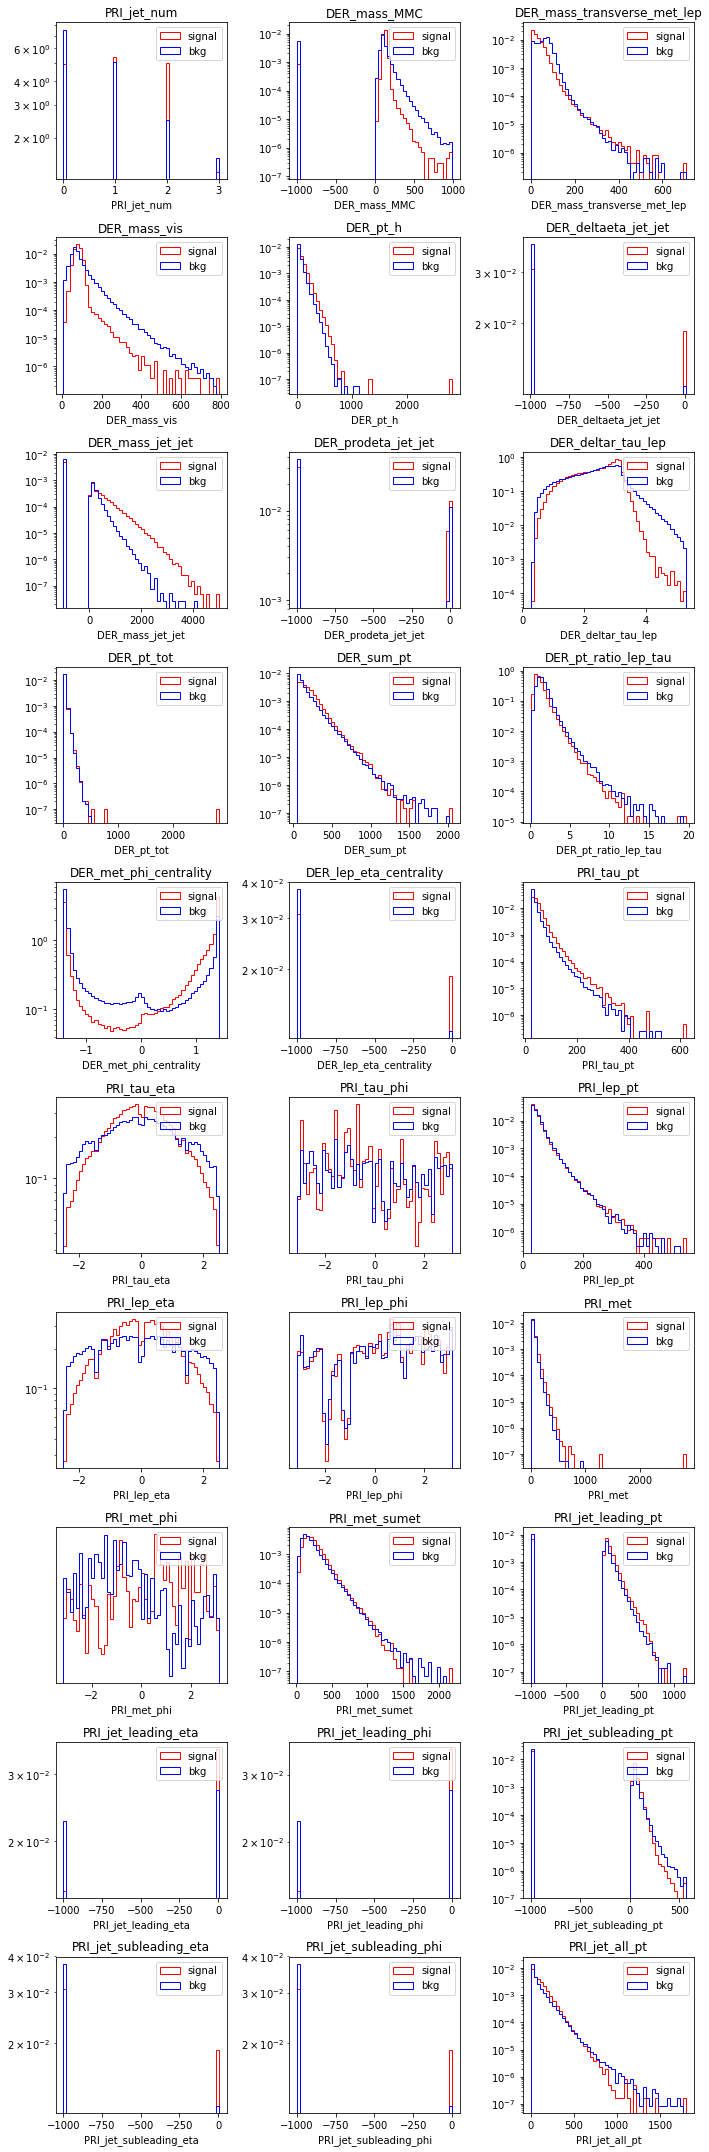

In [11]:
signal_training = training_df[training_df.Label=='s']
bkg_training = training_df[training_df.Label=='b']

variables = [
     'PRI_jet_num',
        'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

fig, ax = plt.subplots(10,3,figsize=(10,30))

varindex = -1
for axlist in ax:
    for ax_i in axlist:
        varindex+=1
        varname = variables[varindex]
        
        h = ax_i.hist(signal_training[varname],
                      bins=50,histtype='step',edgecolor='r',label='signal',density=True)
        binning = h[1]
        ax_i.hist(bkg_training[varname],
                  bins=binning,histtype='step',edgecolor='b',label='bkg',density=True)
        
        ax_i.legend()
        ax_i.set_title(varname)
        ax_i.set_xlabel(varname)
        ax_i.set_yscale('log')

plt.tight_layout()
plt.show()

notice in the  plots that some entries have the value -999
this represents a "missing" input, that for some reason can not be filled for that row
we need to do something about this,
first we mark these entries by replacing them with Nan (not a number), 

and then below we will manipulate the dataset to deal with it (using "transforms")

In [12]:
training_df = training_df.replace(-999.000, np.nan)
valid_df = valid_df.replace(-999.000, np.nan)
test_df = valid_df.replace(-999.000, np.nan)

but first, to define the transforms we need to:

## define the variables of the dataset

the dep_var (dependent variable) is what we want to predict,

cat_names stands for "categorical names", variables which describe distinct cateogries
cont_names is "continuous", for variables which are continuous...

we don't HAVE to make this distinction, but it might be usefull, especially in cases with many cateogries (not this one)

In [13]:
dep_var = 'Label'
cat_names = ['PRI_jet_num']
cont_names = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

## defining the transforms

we will use "FillMissing" and then "Normalize"

FillMissing - take those entries we marked as Nan's, find the mean of that column, and replace the Nan with the mean
the argument "add_col" tells the transform to add a column to the dataset that tells the network when we had to replace a Nan. but in this particular dataset, the existance of Nan's relates directly to one variable, "PRI_jet_num", so we will not add extra columns.


In [14]:
transform = FillMissing(cat_names, cont_names,add_col=False)
transform.apply_train(training_df)

after using the transofrm on the training dataset, we apply it to the validation and test - the difference is that we use the replacment value we found on the training dataset for the validation and test

In [15]:
transform.apply_test(valid_df)
transform.apply_test(test_df)

Normalize will take each column, subtract its mean, and divide by it's variance, to give us mean =0 and var = 1
neural networks require this transformation for numerical reasons (which we will discuss in class)

In [16]:
transform = Normalize(cat_names, cont_names)
transform(training_df)

In [17]:
transform.apply_test(valid_df)
transform.apply_test(test_df)

## examine the dataset after the transformations

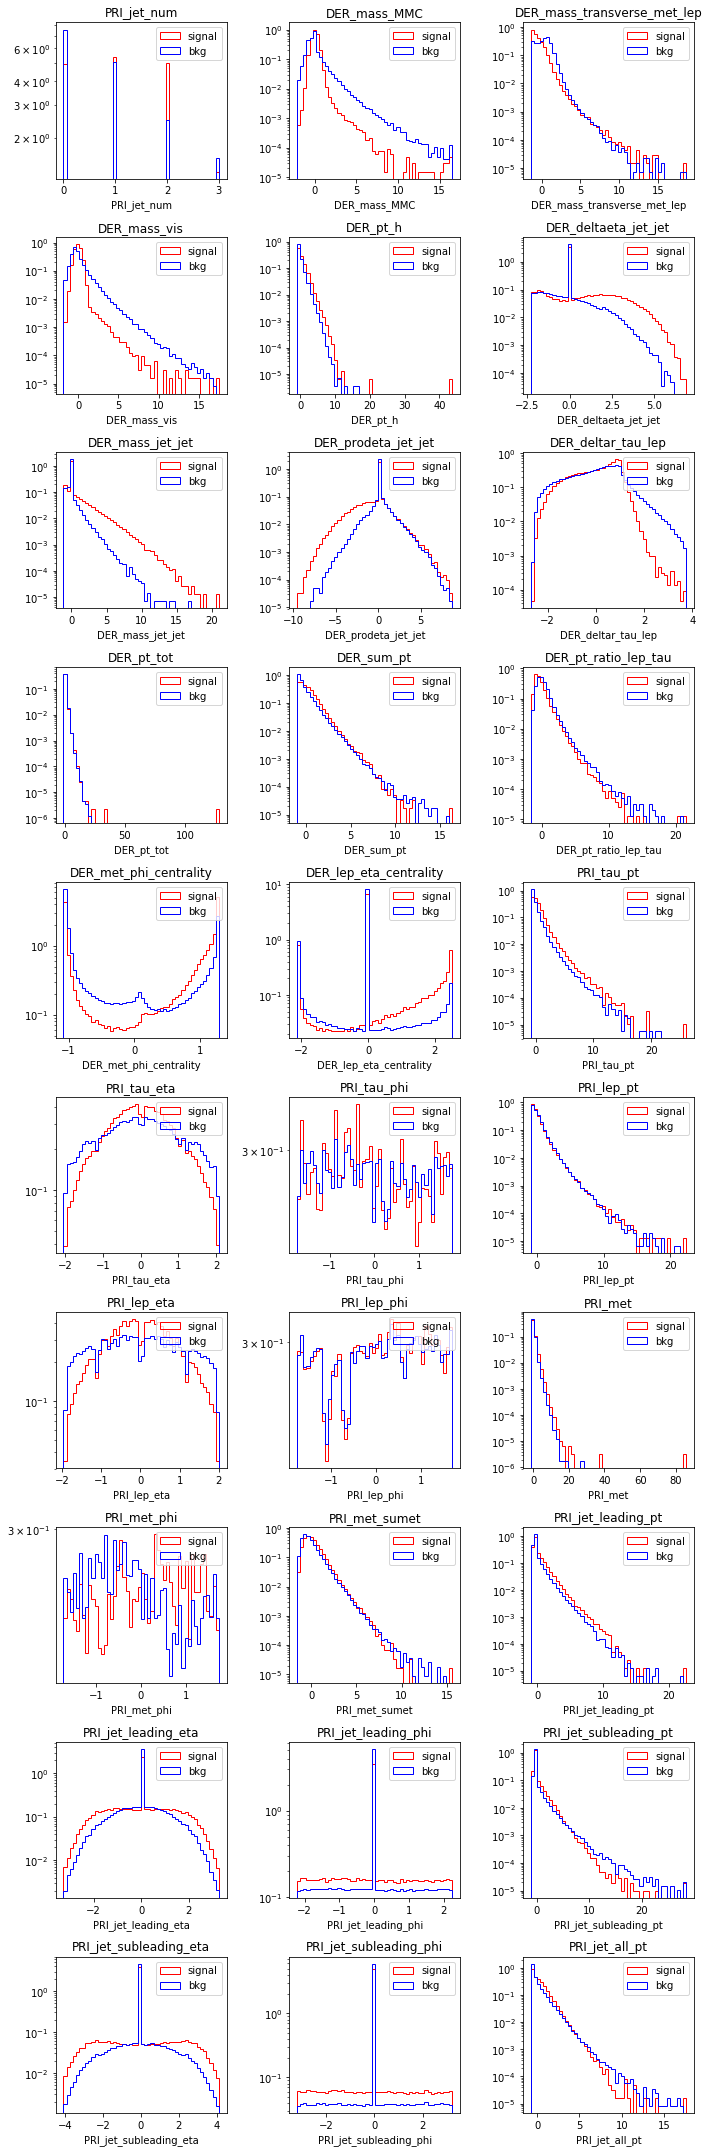

In [18]:
signal_training = training_df[training_df.Label=='s']
bkg_training = training_df[training_df.Label=='b']

fig, ax = plt.subplots(10,3,figsize=(10,30))

varindex = -1
for axlist in ax:
    for ax_i in axlist:
        varindex+=1
        varname = variables[varindex]
        
        h = ax_i.hist(signal_training[varname],
                      bins=50,histtype='step',edgecolor='r',label='signal',density=True)
        binning = h[1]
        ax_i.hist(bkg_training[varname],
                  bins=binning,histtype='step',edgecolor='b',label='bkg',density=True)
        
        ax_i.legend()
        ax_i.set_title(varname)
        ax_i.set_xlabel(varname)
        ax_i.set_yscale('log')
        
plt.tight_layout()
plt.show()

## create the dataset object

note we add something called "Categorify" as a "proc"
this is something technical I don't want to get into here, you need it when using categorical variables that are not integers.

In [182]:
valid_idx = range(len(training_df), len(training_df)+len(valid_df))

procs = [Categorify]

data = TabularDataBunch.from_df('.', pd.concat([training_df,valid_df]), dep_var=dep_var, 
                                valid_idx=valid_idx, cat_names=cat_names,
                                cont_names=cont_names,procs=procs,
                               bs=400) #notice the bs = batch size

## what does the dataset object do?

we can examine the output it gives for each "batch" with this line:
this allows us to understand the shape of the input that is passed to our model,
which we need to understand if we want to build our own model

In [184]:
X,y = next(iter(data.train_dl)) # this command will return one batch from the training dataset

In [21]:
#X is a list
print( type(X), 'length ',len(X) )

<class 'list'> length  2


In [185]:
#the first entry is the categorical variables (we just have 1 in this dataset)
cat_x = X[0]
print(cat_x.shape)

torch.Size([400, 1])


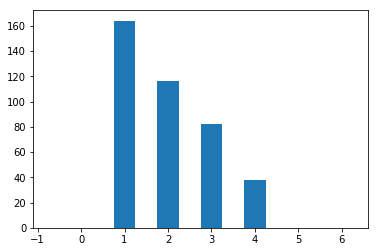

{1, 2, 3, 4}


In [186]:
#lets see what kind of categories we have (there are 4 possible values, 5 if we include 0)
cat_x_values =  cat_x.data.numpy().flatten()

plt.hist(cat_x_values , bins=np.linspace(-0.75,6.25,15) )
plt.show()
print(set( cat_x_values))

In [187]:
#second entry is the continuous variables (29 in this dataset)
cont_x = X[1]
print(cont_x.shape)

torch.Size([400, 29])


In [24]:
# y is the target class label (0 or 1, because we have 2 classes)
print(y.shape)
print(y.numpy()[:10])

torch.Size([150])
[0 0 1 0 0 1 1 1 0 0]


## create a "learner"

In [251]:
learn = tabular_learner(data,layers=[100,50,10], 
                        emb_szs={'PRI_jet_num': 3},
                        emb_drop=0.2, 
                        metrics=accuracy,
                        loss_func=nn.CrossEntropyLoss())

a tabular learner has a default model that it creates based on the arguments and the dataset,
we can examine it:

In [245]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(5, 3)
  )
  (emb_drop): Dropout(p=0.2)
  (bn_cont): BatchNorm1d(29, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=32, out_features=100, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=50, out_features=10, bias=True)
    (7): ReLU(inplace)
    (8): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=10, out_features=2, bias=True)
  )
)

## looking inside the model

we can also look at the model init and forward functions, to understand how it is built
run the cells below to look at the source code of these functions

In [241]:
# run this cell to see the model source code
learn.model??

In [27]:
learn.model.__init__??

## replacing the model with your own model

you can define a model and replace the model inside the learner,
the only thing you have to match, is the inputs to the forward function.
we saw in the source code it takes x_cat,x_cont, so we pass those to our forward function

In the model below, the network takes the input, finds the batch size, and then predicts its a background event no matter what... but it already gives you 65% accuracy!

In [277]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(29,100)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(102,2)
        
    def forward(self, x_cat,x_cont):
        
        
        batch_sz = cont_x.shape[0]
        
        fake_output = torch.stack((5*torch.ones(batch_sz,requires_grad=True),
                                   torch.zeros(batch_sz,requires_grad=True)),dim=1)
        
        
        return fake_output

    
## Note on using a GPU/CPU:
# any tensor that exists in the code can be stored in memory on the GPU or the CPU
# 
# in the above model I created a tensor from scratch "fake_output"
# this tensor is put on the cpu by default,
# therefore when you try to train this model, it tries to compare the output of the network (which is on the cpu)
# to the target, which is put on the GPU autoamtically (if fastai detects that a GPU is available).
# therefore to fix the error that you get when you try to run this model,
# put the tensor on the GPU by doing:
# fake_output = torch.stack((5*torch.ones(batch_sz,requires_grad=True),
#                                   torch.zeros(batch_sz,requires_grad=True)),dim=1)
# fake_output.cuda() <- this command, cuda(), moves the tensor to the GPU
# return fake_output
# if you create a model that actually uses the inputs, you don't need to do this, since the inputs are on the GPU
# and any manipulation you do on them stays on the GPU.

#here is an example of a model that uses the inputs and gives a prediction based on those inputs

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.emb = nn.Embedding(num_embeddings=5, embedding_dim=3)
        
        self.batch_norm1 = nn.BatchNorm1d(29)
        
        self.batch_norm2 = nn.BatchNorm1d(100)
        self.batch_norm3 = nn.BatchNorm1d(50)
        self.batch_norm4 = nn.BatchNorm1d(10)
        
        self.activation = nn.ReLU()

        self.layer1 = nn.Linear(32,100)
        self.layer2 = nn.Linear(100,50)
        self.layer3 = nn.Linear(50,10)
        self.layer4 = nn.Linear(10,2)
        
    def forward(self, x_cat, x_cont):
        
        x_cat = x_cat.view(-1) # x_cat will have shape [batch_size,1] and we want it to be 1D, not 2D
        
        x_cat = self.emb(x_cat)
        x_cont = self.batch_norm1(x_cont)
        
        out = torch.cat([x_cat,x_cont],dim=1)
        
        out = self.activation( self.layer1(out) )
        out = self.batch_norm2(out)
        out = self.activation( self.layer2(out) )
        out = self.batch_norm3(out)
        out = self.activation( self.layer3(out) )
        out = self.batch_norm4(out)
        out = self.layer4(out)
        return out

In [278]:
net = Net()

# when you create your own model, you should create a new learner with the data, like this:
learn = Learner(data,net,metrics=accuracy)

# previously I said (and I was wrong) that it should be done like this:
# learn.model = net
# this "insertion" seems to mess something up in the interaction 
# of the model and training loop, so stick to the method shown above.

if we run the learning rate finder with this model, it obiously does not matter what learning rate we use, since the output is always "background"

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


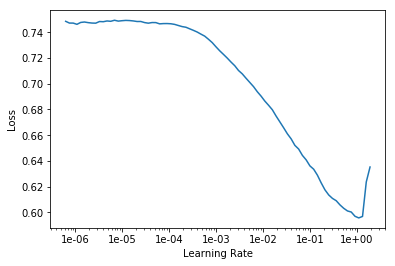

In [279]:
learn.lr_find()
learn.recorder.plot()

In [280]:
learn.fit(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.367246,0.367277,0.833600,00:34
1,0.364016,0.365686,0.834073,00:37


## lets look at the prediction

we can "predict" on one row from the dataframe

In [281]:

learn.predict(valid_df.iloc[0])

(Category b, tensor(0), tensor([0.7037, 0.2963]))

or we can predict on the entire validation dataset,
getting the numerical prediction 

In [282]:
preds,y = learn.get_preds(ds_type=DatasetType.Valid)


In [283]:
#let's select only one column from the prediction (since it's only two classes, and they sum to 1)
preds = preds.data.numpy()[:,0]

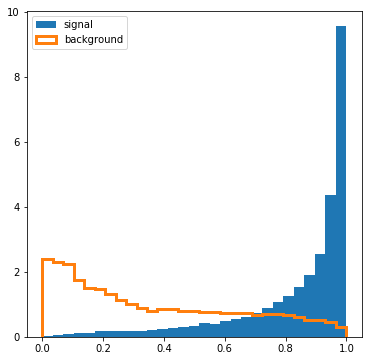

In [284]:
preds_sig = preds[y.numpy()==0]
preds_bkg = preds[y.numpy()==1]

bins = np.linspace(0,1,30)

fig,ax = plt.subplots(figsize=(6,6))

ax.hist(preds_sig,bins=bins,density=True,label='signal')
ax.hist(preds_bkg,bins=bins,density=True,histtype='step',linewidth=3,label='background')
plt.legend()
plt.show()

## making a roc curve

we can take our prediction and plot the true positive rate vs. false positive rate

Text(0, 0.5, 'true positive rate')

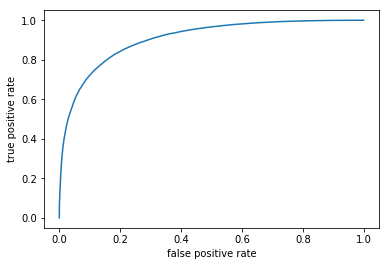

In [285]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y.numpy(), preds, pos_label=0)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

## if we use the built in model, and train for 2 epochs,

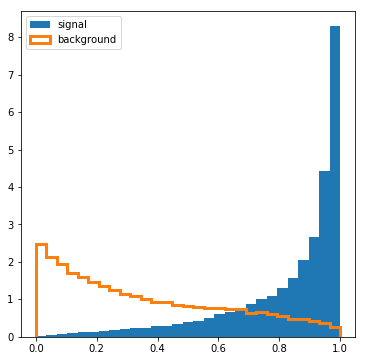

In [223]:
preds_sig = preds[y.numpy()==0]
preds_bkg = preds[y.numpy()==1]

bins = np.linspace(0,1,30)

fig,ax = plt.subplots(figsize=(6,6))

ax.hist(preds_sig,bins=bins,density=True,label='signal')
ax.hist(preds_bkg,bins=bins,density=True,histtype='step',linewidth=3,label='background')
plt.legend()
plt.show()

Text(0,0.5,'true positive rate')

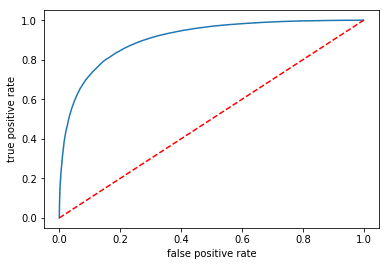

In [225]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y.numpy(), preds, pos_label=0)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],c='r',linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

## Saving the model

Once you are done with your model, you need to save it and submit it to us, we will evaluate all the models on the test set and post the ranking on the forum, so we can see if anyone came up with an approach that increased the performance

if you used the built in TabularModel, and did not build your own model to replace learn.model,
save it this way, and only submit the pkl file

In [175]:
learn.export('my_model.pkl')

## if you used a custom model

and you created an instance net (as I did above),
save it this way:

In [176]:
torch.save(net.state_dict(), 'my_custom_model.pkl')

## IMPORTANT - if you used a custom model

if you used a custom model, you must submit with your homework a .py file (please name it mymodel.py) that includes the definition of your model.
an example mymodel.py file will be on the course website, and you can create one by creating a jupyter notebook with your model definition and saving it (in the jupyter notebook, choose to download as .py file)

## loading the model

to test your model saving/loading,
here is the code to load the saved models above

## fastai built in model

In [179]:
predictor = load_learner(path='.',fname='my_model.pkl',test=TabularList.from_df(valid_df))

preds,y = predictor.get_preds(ds_type=DatasetType.Test)

## custom model

In [195]:
from mymodel import Net #this assumes you have the mymodel.py file in your directory

net = Net()

net.load_state_dict(torch.load('my_custom_model.pkl'))

net.eval();

learn = Learner(data,net)

preds,y = learn.get_preds(ds_type=DatasetType.Valid)